# Аналитика крупного интернет-магазина. 
### Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

<a name="0.0"></a>
## Содержание:
* [1. Загрузим данные и подготовимся к их анализу](#0.0)
* [2. Приоритизация гипотез](#2.0)
     - [2.1. ICE](#2.1)
     - [2.2. RICE](#2.2)
         
* [3. Анализ A/B-теста](#3.0)
     - [3.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#3.1)
     - [3.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#3.2)
     - [3.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#3.3)
     - [3.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#3.4)
     - [3.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#3.5)
     - [3.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#3.6)
     - [3.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#3.7)
     - [3.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#3.8)
     - [3.9 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#3.9)
     - [3.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#3.10)
     - [3.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#3.11)
     - [3.12 Очистка данных.](#3.12)
     - [3.12.1 LEVEL1: Очистим данные, уберем заказы больше 4 и где выручка составила больше 58233.2 у.е.](#3.12.1)
     - [3.12.2 LEVEL2: Чистка данных.](#3.12.2)     
     - [3.13 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#3.13)
     - [3.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#3.14)
     - [3.15 Выводы.](#3.15)

<a name="1."></a><br/>
<font size="5"><b>1. Загрузим данные и подготовимся к их анализу</b></font>.<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [1]:
import time
start_1 = time.time()
# импорт библиотеки pandas
import pandas as pd 
# библиотеки для визуализации
import matplotlib.pyplot as plt
# импортируем библиотеки для мат.расчетов
import numpy as np
import scipy.stats as stats


pd.set_option('display.max_colwidth', -1)
#pd.set_option('max_colwidth', 800)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
def info(name):
    print(name.head(5),'\n'*2,'-'*100)
    print('Информация')
    print(name.info(),'\n'*2,'-'*100)
    print('Количество пропусков:')
    print(name.isnull().sum(),'\n'*2,'-'*100)
    print('Количество дубликатов:',name.duplicated().sum())    

In [4]:
info(hypothesis)

                                                                                                     Hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                               

   Reach  Impact  Confidence  Efforts  
0  3      10      8           6        
1  2      5       4           10       
2  8      3       7           3        
3  8      3       3           8        
4  3      1       1           1         

 ------------------------------------------------------------------

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [5]:
info(orders)

   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B    

 ----------------------------------------------------------------------------------------------------
Информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 

 ----------------------------------------------------------------------------------------------------
Количество пропусков:
transactionId    0
visitorId        0
date             0
revenue          

transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.

In [6]:
info(visitors)

         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756      

 ----------------------------------------------------------------------------------------------------
Информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 

 ----------------------------------------------------------------------------------------------------
Количество пропусков:
date        0
group       0
visitors    0
dtype: int64 

 ----------------------------------------------------------------------------------------------------
Количество дубликатов: 0


In [8]:
orders.sort_values('revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="2.0"></a><br/>
<font size="5"><b>2. Приоритизация гипотез</b></font><br/>
<a name="2.1"></a><br/>
<font size="4">2.1 ICE</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:

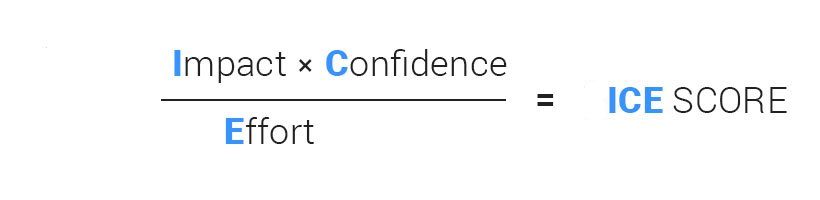

In [7]:
hypothesis['Ice_score']=(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='Ice_score', ascending=False)[['Hypothesis','Ice_score']]

,Hypothesis,Ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<a name="2.2"></a><br/>
<font size="4">2.2 RICE</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

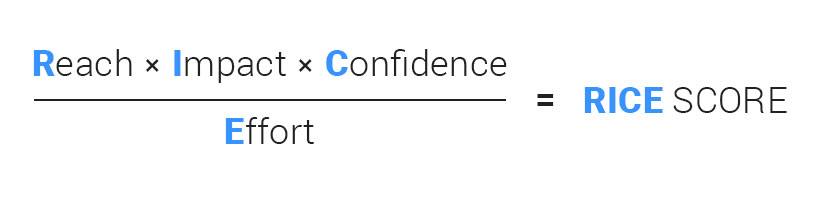

In [8]:
hypothesis['Rice_score']=hypothesis['Impact']*hypothesis['Reach']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis.sort_values(by='Rice_score', ascending=False)[['Hypothesis','Rice_score','Ice_score']]

,Hypothesis,Rice_score,Ice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


##### Мы видим, что результат приоритизация гипотез методом RICE имеет отличные результаты от метода ICE, т.к. показатель REACH имеет сущетсвенное влияние на приоритизацию.
##### Нас интересуют в первую очередь гипотезы имеющие высокий рейтинг.
##### Так например, гипотеза "Запустить акцию, дающую скидку на товар в день рождения" - оказалась лишь на пятом месте ведь охватат пользователей небольшой.
##### Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на первом месте, охват пользователей самый большой. E-mail рассылки могут значительно увеличить конверсию повторной покупки!

<a name="3.0"></a><br/>
<a name="3.1"></a><br/>
<font size="5">3. Анализ A/B-теста</font><br/>
<font size="3">3.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [9]:
orders_A=orders[orders['group']=="A"]
orders_B=orders[orders['group']=="B"]

In [10]:
orders_A=orders_A.groupby('date').agg({'revenue':'sum','transactionId':'nunique'})
orders_A.rename(columns={'transactionId': 'count_of_orders'}, inplace=True)
orders_A['cum_revenue']=orders_A['revenue'].cumsum()
orders_A['cum_count_of_orders']=orders_A['count_of_orders'].cumsum()
orders_A=orders_A.reset_index()
orders_A.head()

,date,revenue,count_of_orders,cum_revenue,cum_count_of_orders
0,2019-08-01,148579,24,148579,24
1,2019-08-02,93822,20,242401,44
2,2019-08-03,112473,24,354874,68
3,2019-08-04,70825,16,425699,84
4,2019-08-05,124218,25,549917,109


In [11]:
orders_B=orders_B.groupby('date').agg({'revenue':'sum','transactionId':'nunique'})
orders_B.rename(columns={'transactionId': 'count_of_orders'}, inplace=True)
orders_B['cum_revenue']=orders_B['revenue'].cumsum()
orders_B['cum_count_of_orders']=orders_B['count_of_orders'].cumsum()
orders_B=orders_B.reset_index()
orders_B.head()

,date,revenue,count_of_orders,cum_revenue,cum_count_of_orders
0,2019-08-01,101217,21,101217,21
1,2019-08-02,165531,24,266748,45
2,2019-08-03,114248,16,380996,61
3,2019-08-04,108571,17,489567,78
4,2019-08-05,92428,23,581995,101


In [12]:
# функция для графика
def make_graf(table1,table2,col,title):
    fig, ax = plt.subplots(figsize=(15,6))
    plt.plot(table1['date'], table1[col], 'o-r', label='Group A')
    plt.text(table1.loc[table1[table1[col]==table1[col].max()].index[0],'date'], table1[col].max(), int(table1[col].max()), horizontalalignment='center',rotation=30,verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
    plt.plot(table2['date'], table2[col], 'o-g', label='Group B')
    plt.text(table2.loc[table2[table2[col]==table2[col].max()].index[0],'date'], table2[col].max(), int(table2[col].max()), horizontalalignment='right',rotation=30,verticalalignment='top', fontdict={'fontweight':500, 'size':12})
    ax.set_xticklabels(table1['date'],rotation=45)
    plt.grid(True)
    plt.title(title,fontsize='xx-large')
    plt.legend(loc='upper left')

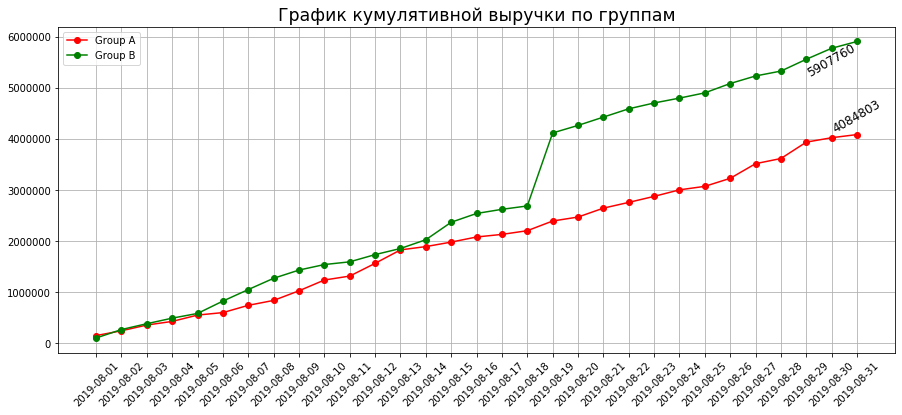

In [13]:
make_graf(orders_A,orders_B,'cum_revenue','График кумулятивной выручки по группам')

##### На графике видно как кумулятивная выручка обоих групп растет примерно с равным темпом до 2019-08-18, затем 2019-08-19 резкий рост выручки в группе B.

In [14]:
print('Итог суммарной выручки группы В превысил выручку А на',orders_B['cum_revenue'].max()-orders_A['cum_revenue'].max())
print('т.е. группа В на {:.1%} превысила этот показатель группы А'.format(1-orders_A['cum_revenue'].max()/orders_B['cum_revenue'].max()))

Итог суммарной выручки группы В превысил выручку А на 1822957
т.е. группа В на 30.9% превысила этот показатель группы А


<a name="3.2"></a><br/>
<font size="3">3.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [15]:
orders_A['cum_mean_check']=orders_A['cum_revenue']/orders_A['cum_count_of_orders']
orders_B['cum_mean_check']=orders_B['cum_revenue']/orders_B['cum_count_of_orders']

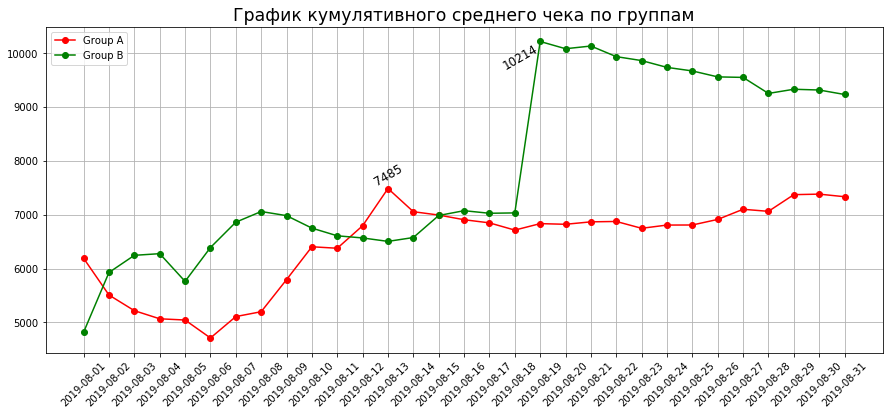

In [16]:
make_graf(orders_A,orders_B,'cum_mean_check','График кумулятивного среднего чека по группам')

##### На графике видно как и с графиком кумулятивная выручки, что кумулятивный средний чек обоих групп растет примерно с равным темпом до 2019-08-18, затем 2019-08-19 резкий рост среднего чека в группе B.
##### На графике выведены максимальные значения по кумулятивному среднему чеку каждой из групп.

<a name="3.3"></a><br/>
<font size="3">3.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [17]:
mergedCummulative= orders_A.merge(orders_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCummulative.head()

,date,revenueA,count_of_ordersA,cum_revenueA,cum_count_of_ordersA,cum_mean_checkA,revenueB,count_of_ordersB,cum_revenueB,cum_count_of_ordersB,cum_mean_checkB
0,2019-08-01,148579,24,148579,24,6190.791667,101217,21,101217,21,4819.857143
1,2019-08-02,93822,20,242401,44,5509.113636,165531,24,266748,45,5927.733333
2,2019-08-03,112473,24,354874,68,5218.735294,114248,16,380996,61,6245.836066
3,2019-08-04,70825,16,425699,84,5067.845238,108571,17,489567,78,6276.500000
4,2019-08-05,124218,25,549917,109,5045.110092,92428,23,581995,101,5762.326733


Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

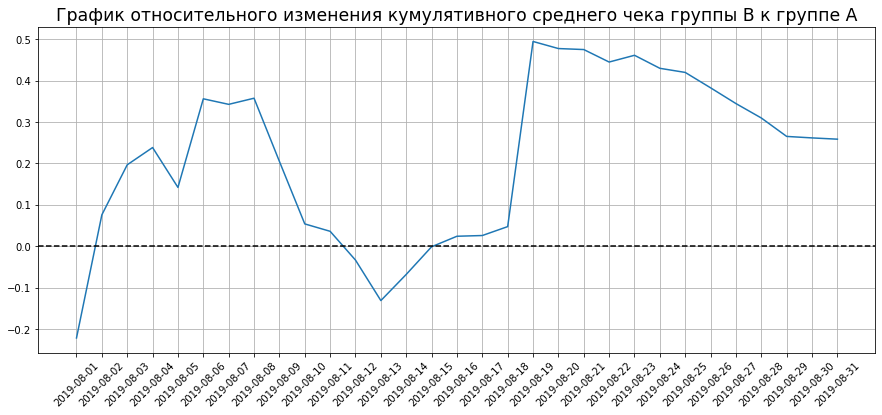

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
# cтроим отношение средних чеков
plt.plot(mergedCummulative['date'], mergedCummulative['cum_mean_checkB']/mergedCummulative['cum_mean_checkA']-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

ax.set_xticklabels(mergedCummulative['date'],rotation=45)
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A',fontsize='xx-large')

##### На графике видно, что кумулятивный средний чек группы B почти на протяжение всего периода был выше, чем у группы А. За исключением старта и периода с 2019-08-11 по 2019-08-15.

<a name="3.4"></a><br/>
<font size="3">3.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Аналогично проанализируем график кумулятивной конверсии(визиты в заказы).

In [19]:
visitors_A=visitors.query('group=="A"')[['date','visitors']]
visitors_A.rename(columns={'visitors': 'visitorsA'}, inplace=True)
visitors_A['cum_visitorsA']=visitors_A['visitorsA'].cumsum()

visitors_B=visitors.query('group=="B"')[['date','visitors']].reset_index()
del visitors_B['index']
visitors_B.rename(columns={'visitors': 'visitorsB'}, inplace=True)
visitors_B['cum_visitorsB']=visitors_B['visitorsB'].cumsum()

In [20]:
mergedCummulative=mergedCummulative.merge(visitors_A, on='date')
mergedCummulative=mergedCummulative.merge(visitors_B, on='date')

In [21]:
mergedCummulative['conversionA'] = (mergedCummulative['cum_count_of_ordersA']/mergedCummulative['cum_visitorsA']).round(5)
mergedCummulative['conversionB'] = (mergedCummulative['cum_count_of_ordersB']/mergedCummulative['cum_visitorsB']).round(5)

Text(0.5, 1.0, 'График кумулятивной конверсии по группам')

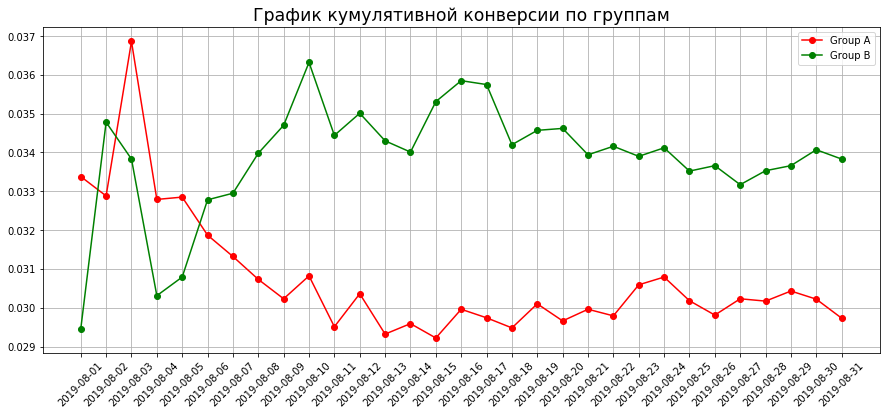

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(mergedCummulative['date'], mergedCummulative['conversionA'],'o-r',label='Group A')
plt.plot(mergedCummulative['date'], mergedCummulative['conversionB'],'o-g',label='Group B')
ax.set_xticklabels(mergedCummulative['date'],rotation=45)
plt.grid(True)
plt.legend()
plt.title('График кумулятивной конверсии по группам',fontsize='xx-large')

##### Конверсия у группы B выше, чем у группы А. Визитеры группы B чаще становятся покупателями.

<a name="3.5"></a><br/>
<font size="3">3.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Text(0.5, 1.0, 'График относительного изменения кумулятивной конверсии группы B к группе A')

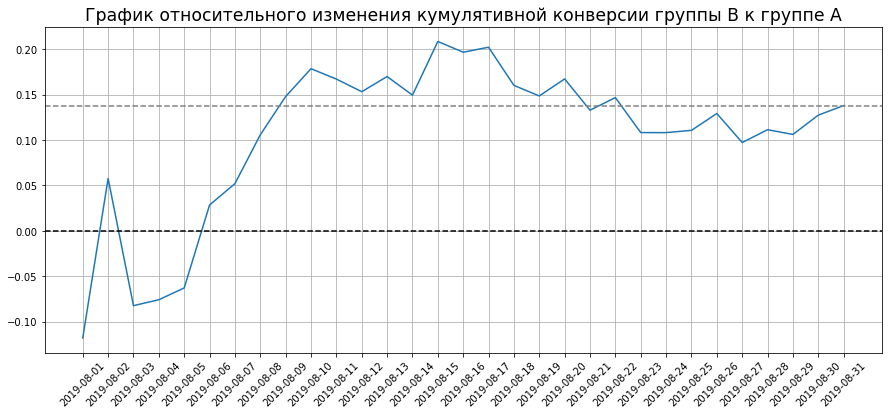

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
# cтроим отношение средних чеков
plt.plot(mergedCummulative['date'], mergedCummulative['conversionB']/mergedCummulative['conversionA']-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=(mergedCummulative.loc[30,'conversionB']/mergedCummulative.loc[30,'conversionA']-1), color='grey', linestyle='--')

ax.set_xticklabels(mergedCummulative['date'],rotation=45)
plt.grid(True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A',fontsize='xx-large')

##### В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Несмотря на то, что рост у группы В нестабильный, все же превышает результаты группы А.

<a name="3.6"></a><br/>
<font size="3">3.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [24]:
ordersByUsers = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})
ordersByUsers.sort_values(by='transactionId',ascending=False).head(10)

,transactionId
visitorId,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5
3062433592,5
237748145,5
3803269165,5
1230306981,5


Text(0.5, 1.0, 'Гистограмма заказов')

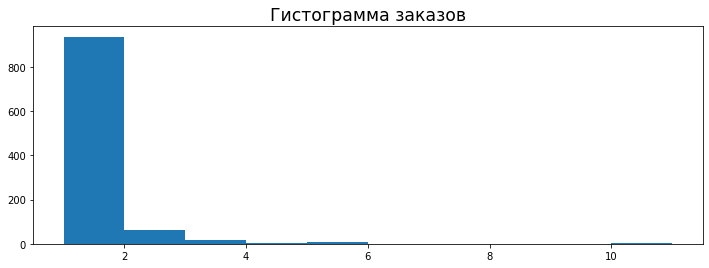

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
plt.hist(ordersByUsers['transactionId'])
plt.title('Гистограмма заказов',fontsize='xx-large')

##### Большинство покупателей заказывали только один раз. Однако доля пользователей с двумя заказами тоже значительна.
##### Построим точечную диаграмму числа заказов на одного пользователя:

Text(0.5, 1.0, 'Точечная диаграмма числа заказов на одного пользователя')

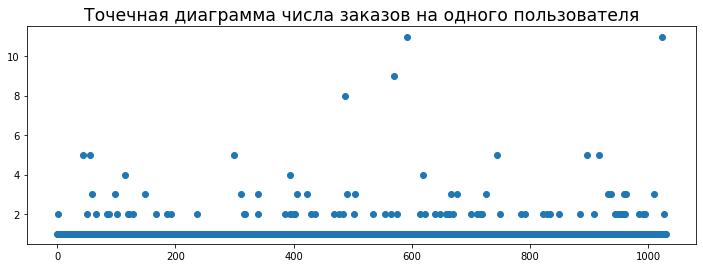

In [26]:
fig, ax = plt.subplots(figsize=(12,4))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('Точечная диаграмма числа заказов на одного пользователя',fontsize='xx-large')

##### Выводы подтверждаются: много пользователей с двумя заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

<a name="3.7"></a><br/>
<font size="3">3.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [27]:
np.percentile(ordersByUsers['transactionId'], [90, 95, 99])

array([1., 2., 4.])

##### Не более 5% пользователей заказывали 2раза. Необходимо выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

Text(0.5, 1.0, 'Точечная диаграмма числа заказов на одного пользователя')

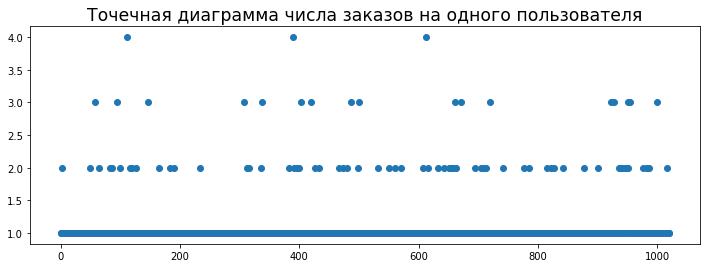

In [28]:
fig, ax = plt.subplots(figsize=(12,4))
x_values = pd.Series(range(0,len(ordersByUsers[ordersByUsers['transactionId']<=4])))
plt.scatter(x_values, ordersByUsers[ordersByUsers['transactionId']<=4])
plt.title('Точечная диаграмма числа заказов на одного пользователя',fontsize='xx-large')

<a name="3.8"></a><br/>
<font size="3">3.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [29]:
revenueByUsers=orders['revenue'].reset_index()

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

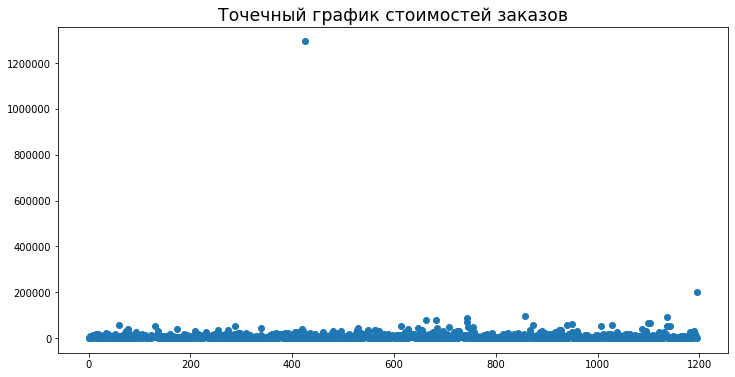

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, revenueByUsers['revenue'])
plt.title('Точечный график стоимостей заказов',fontsize='xx-large')

##### По графику видны несколько аномалий, каких то выводов не возможно сделать.
##### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

<a name="3.9"></a><br/>
<font size="3">3.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [31]:
np.percentile(revenueByUsers['revenue'], [95, 99])

array([28000. , 58233.2])

##### Не более 5% пользователей заказывали на сумму больше 58233.2 Необходимо выбрать 58233.2 для заказа на одного пользователя за нижнюю границу суммы заказа, и отсеять аномальных пользователей по ней. 

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

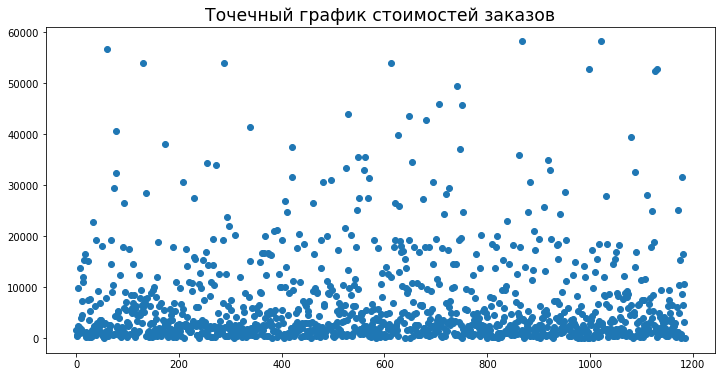

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = pd.Series(range(0,len(revenueByUsers[revenueByUsers['revenue']<=58233.2])))
plt.scatter(x_values, revenueByUsers[revenueByUsers['revenue']<=58233.2]['revenue'])
plt.title('Точечный график стоимостей заказов',fontsize='xx-large')

##### Стало лучше, теперь отчетливо видно, что основная часть заказов вариируется до 5000 у.е.

<a name="3.10"></a><br/>
<font size="3">3.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [33]:
mergedCummulative.head(1)

,date,revenueA,count_of_ordersA,cum_revenueA,cum_count_of_ordersA,cum_mean_checkA,revenueB,count_of_ordersB,cum_revenueB,cum_count_of_ordersB,cum_mean_checkB,visitorsA,cum_visitorsA,visitorsB,cum_visitorsB,conversionA,conversionB
0,2019-08-01,148579,24,148579,24,6190.791667,101217,21,101217,21,4819.857143,719,719,713,713,0.03338,0.02945


In [34]:
print("{0:.9f}".format(stats.mannwhitneyu(mergedCummulative['conversionB'], mergedCummulative['conversionA'])[1]))
print("{0:.5f}".format(mergedCummulative['conversionB'].mean()/mergedCummulative['conversionA'].mean()-1))

0.000000013
0.10177


##### P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 10.2%.

<a name="3.11"></a><br/>
<font size="3">3.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [35]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [36]:
print("{0:.9f}".format(stats.mannwhitneyu(orders.query('group=="B"')['revenue'], orders.query('group=="A"')['revenue'])[1]))
print("{0:.5f}".format(orders.query('group=="B"')['revenue'].mean()/orders.query('group=="A"')['revenue'].mean()-1))

0.364645493
0.25871


##### P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. А вот относительное различие среднего чека между сегментами составляет 25,9%

<a name="3.12"></a><br/>
<a name="3.12.1"></a><br/>
<font size="3">3.12 Чистка данных</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

<font size="3">3.12.1 LEVEL1: Очистим данные, уберем заказы больше 4 и где выручка составила больше 58233.2 у.е.</font><br/>

In [37]:
# у нас есть список покупателей и кол-во заказов
ordersByUsers=ordersByUsers.reset_index()
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [38]:
# составим список покупателей у которых больше 3х заказов, запишем в переменную anomaly_buyers1
anomaly_buyers1=ordersByUsers.query('transactionId>4')['visitorId'].unique().tolist()
print('Покупателей совершивших больше 4х заказов :',len(anomaly_buyers1))

Покупателей совершивших больше 4х заказов : 10


In [39]:
# составим список покупателей у которых выручка по заказу составила больше 40000 у.е., 
# запишем в переменную anomaly_buyers2
anomaly_buyers2=orders.query('revenue>58233.2')['visitorId'].unique().tolist()
print('Покупателей у которых выручка по заказу составила больше 58233.2 у.е.:',len(anomaly_buyers2))

Покупателей у которых выручка по заказу составила больше 58233.2 у.е.: 11


In [40]:
# единый список покупателей которые относятся к выбросам сохраним в anomaly_buyers2
for name in anomaly_buyers1:
    if name not in anomaly_buyers2:
        anomaly_buyers2.append(name)        
print('Количесто покупателей данные по которам являются выбросы:',len(anomaly_buyers2))

Количесто покупателей данные по которам являются выбросы: 21


In [41]:
print('Выручка от клиентов значение, которых мы подсчитали как выбросы:', orders.query('visitorId==@anomaly_buyers2')['revenue'].sum())
print('Выручка от массового клиента:', orders.query('visitorId!=@anomaly_buyers2')['revenue'].sum())
print('Доля клиентов anomaly_buyers2 в {:.2%} от всех клиентов,'.format(len(anomaly_buyers2)/len(ordersByUsers)), 'приносит нам  {:.2%} от всей выручки'.format(orders.query('visitorId==@anomaly_buyers2')['revenue'].sum()/orders['revenue'].sum()))

Выручка от клиентов значение, которых мы подсчитали как выбросы: 2808409
Выручка от массового клиента: 7184154
Доля клиентов anomaly_buyers2 в 2.04% от всех клиентов, приносит нам  28.10% от всей выручки


##### Эти цифры говорят о том, что даже если выбрать пороги по заказам и выручки в 1%, такие пользователи делают нам 28% всей выручки, при том, что таких пользователей всего 2%!!
##### Считаю просто необходимо вывести таких пользователей в отдельную касту Golden_buyers, затем провести тесты относительно этой группы, но предварительно нужно посмотреть в каком соотношении  распределились пользователи (группа А или В) внутри этой касты Golden_buyers.

##### Нам стоит переорентировать все усилия для привлечения таких пользователей. У нас в разы сократятся трудоресурсы, если мы привлечем хотя бы еще половину от таких VIP покупателей и отпустим в свободное плавание "массмаркет".

In [42]:
# узнаем в каком соотношении распределились пользователи (группа А или В) внутри anomaly_buyers2
A=0
B=0
for name in anomaly_buyers2:
    name_of_group=orders.query('visitorId==@name')['group'].tolist()
    if name_of_group==['A']:
        A+=1
    elif name_of_group==['B']:
        B+=1
print('Пользователей из группы A:',A,'Пользователей из группы B:',B)

Пользователей из группы A: 5 Пользователей из группы B: 4


#####  Что мы видим? То, что из 21 пользователя 5 в группе А и 4 в В! Где остальные? выходят они в А и В одновременно.
##### Один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.

<a name="3.12.2"></a><br/>
<font size="3">3.12.2 LEVEL2: Чистка данных.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>
Посмотрим, что с остальными пользователями.

In [43]:
list_of_buyers_A=orders.query('group=="A"')['visitorId'].unique().tolist()
list_of_buyers_B=orders.query('group=="B"')['visitorId'].unique().tolist()
bad_buyers=[]
for name in list_of_buyers_A:
    if name in list_of_buyers_B:
        bad_buyers.append(name)
print('Количество клиентов, которые есть в двух группах одновременно:',len(bad_buyers))
print('Размер выручки по этим клиентам составляет:', orders.query('visitorId==@bad_buyers')['revenue'].sum())


Количество клиентов, которые есть в двух группах одновременно: 58
Размер выручки по этим клиентам составляет: 1558935


##### Мы не можем просто так взять и выкинуть 58 клиентов, которые принесли нам 1,5млн. 

##### Что делать? 

* 1.Во-первых, надо уведомить людей кто предоставлял данные для тестов, что у них очередные проблеммы в данных.
* 2.Попробуем самостоятельно почистить данные, пока ответственные ищют ошибку при выгрузке. 

##### Каким образом можем почистить? 

##### Можем найти первый визит пользователя и зафиксировать за ним группу первого визита, при условии, что в один и тот же день у него не было визитов под разными идентификаторами групп(если бы у нас фиксировалось еще и время прихода, а не только дата, то нам бы не пришлось делать доп.проверки)

##### Проверим, есть ли пользователи, которые приходили в один и тот же день из разных групп.

In [44]:
orders_bad_buyers=orders.query('visitorId==@bad_buyers').groupby('date')[['visitorId','date','group']].head()
orders_bad_buyers=orders_bad_buyers.reset_index()
del orders_bad_buyers['index']
orders_bad_buyers.head()

,visitorId,date,group
0,4069496402,2019-08-15,A
1,963407295,2019-08-15,B
2,351125977,2019-08-15,B
3,3234906277,2019-08-15,B
4,199603092,2019-08-15,A


In [45]:
first_visit_of_bad_buyers=pd.DataFrame(orders_bad_buyers.groupby('visitorId')['date'].min())
first_visit_of_bad_buyers=first_visit_of_bad_buyers.reset_index()
first_visit_of_bad_buyers.head()

,visitorId,date
0,8300375,2019-08-01
1,199603092,2019-08-02
2,232979603,2019-08-31
3,237748145,2019-08-20
4,276558944,2019-08-12


In [46]:
epic_fail_uid=[]
for i in range(len(first_visit_of_bad_buyers)):
    uid=first_visit_of_bad_buyers.loc[i, 'visitorId']
    date=first_visit_of_bad_buyers.loc[i, 'date']
    if len(orders_bad_buyers.query('visitorId==@uid & date==@date')['group'].tolist())>1:
        epic_fail_uid.append(uid)
print('Количество покупателей,которые в свой ПЕРВЫЙ день покупки имели разные идентификаторы групп:', len(epic_fail_uid))
print('Размер выручки по этим клиентам составляет:', orders.query('visitorId==@epic_fail_uid')['revenue'].sum(),'это {:.2%} от всей выручки'.format(orders.query('visitorId==@epic_fail_uid')['revenue'].sum()/orders['revenue'].sum()))

Количество покупателей,которые в свой ПЕРВЫЙ день покупки имели разные идентификаторы групп: 12
Размер выручки по этим клиентам составляет: 358038 это 3.58% от всей выручки


In [47]:
# почистим orders от неисправимых клиентов из списка epic_fail_uid и anomaly_buyers2
filtred_uid=epic_fail_uid+anomaly_buyers2
orders=orders.query('visitorId!=@filtred_uid')
orders=orders.reset_index()
del orders['index']
orders.tail()

,transactionId,visitorId,date,revenue,group
1094,3592955527,608641596,2019-08-14,16490,B
1095,2662137336,3733762160,2019-08-14,6490,B
1096,2203539145,370388673,2019-08-14,3190,A
1097,1807773912,573423106,2019-08-14,10550,A
1098,1947021204,1614305549,2019-08-14,100,A


##### Перекрасим группы покупателей в таблице orders по первой покупке.(Правильней нам делать это было бы по таблице визитов, но в ней только агригированные данные, нет информации по заходам)

In [48]:
for name in filtred_uid:
    try:
        bad_buyers.remove(name)
        continue
    except ValueError:
        continue
print('Количество покупателей для исправления группы:',len(bad_buyers))

Количество покупателей для исправления группы: 38


In [49]:
# проверка
orders.query('visitorId==@bad_buyers[1]')

,transactionId,visitorId,date,revenue,group
117,1665445278,1738359350,2019-08-22,3070,A
307,3006440800,1738359350,2019-08-28,890,B
794,2229298010,1738359350,2019-08-30,2000,B


In [50]:
# красим группы в нужную букву
for name in bad_buyers:
    date=orders.query('visitorId==@name')['date'].min()   
    group=orders.query('visitorId==@name & date==@date')['group'].tolist()
    index=orders.query('visitorId==@name').index.tolist()
    orders.loc[index,'group']=group[0]

In [51]:
# проверка
orders.query('visitorId==@bad_buyers[1]')

,transactionId,visitorId,date,revenue,group
117,1665445278,1738359350,2019-08-22,3070,A
307,3006440800,1738359350,2019-08-28,890,A
794,2229298010,1738359350,2019-08-30,2000,A


##### Исправили,что смогли, но опять же есть большой вопрос к таблице визитов. 
##### Таблица визитов связана с orders, и поидее должен поменятся перевес количества визитов из группы А в В, но доказать наличие ошибок в ней по аналогии с orders у нас нет возможности, т.к данные там агрегированы.

<a name="3.13"></a><br/>
<font size="3">3.13 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [52]:
count_of_ordersByUsersA_clean=orders.query('group=="A"').groupby('date').agg({'transactionId':'nunique'}).reset_index()
count_of_ordersByUsersA_clean['cum_count_of_ordersA_clean']=count_of_ordersByUsersA_clean['transactionId'].cumsum()
count_of_ordersByUsersB_clean=orders.query('group=="B"').groupby('date').agg({'transactionId':'nunique'}).reset_index()
count_of_ordersByUsersB_clean['cum_count_of_ordersB_clean']=count_of_ordersByUsersB_clean['transactionId'].cumsum()

In [53]:
count_of_ordersByUsersA_clean['conversionA_clean']=(count_of_ordersByUsersA_clean['cum_count_of_ordersA_clean']/mergedCummulative['cum_visitorsA']).round(5)
count_of_ordersByUsersA_clean.tail()

,date,transactionId,cum_count_of_ordersA_clean,conversionA_clean
26,2019-08-27,26,449,0.02742
27,2019-08-28,17,466,0.02746
28,2019-08-29,21,487,0.02775
29,2019-08-30,10,497,0.02755
30,2019-08-31,10,507,0.02706


In [54]:
count_of_ordersByUsersB_clean['conversionB_clean']=(count_of_ordersByUsersB_clean['cum_count_of_ordersB_clean']/mergedCummulative['cum_visitorsB']).round(5)
count_of_ordersByUsersB_clean.tail()

,date,transactionId,cum_count_of_ordersB_clean,conversionB_clean
26,2019-08-27,12,512,0.03099
27,2019-08-28,25,537,0.03126
28,2019-08-29,16,553,0.03123
29,2019-08-30,21,574,0.03154
30,2019-08-31,18,592,0.03130


In [55]:
print("{0:.9f}".format(stats.mannwhitneyu(count_of_ordersByUsersB_clean['conversionB_clean'], count_of_ordersByUsersA_clean['conversionA_clean'])[1]))
print("{0:.5f}".format(count_of_ordersByUsersB_clean['conversionB_clean'].mean()/count_of_ordersByUsersA_clean['conversionA_clean'].mean()-1))

0.000000004
0.15074


##### P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 15.1%.

<a name="3.14"></a><br/>
<font size="3">3.14 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [56]:
print("{0:.9f}".format(stats.mannwhitneyu(orders.query('group=="B"')['revenue'], orders.query('group=="A"')['revenue'])[1]))
print("{0:.5f}".format(orders.query('group=="B"')['revenue'].mean()/orders.query('group=="A"')['revenue'].mean()-1))

0.358518203
-0.05640


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами составляет -5,6%, что является незначительным результатом.

<a name="3.15"></a><br/>
## Выводы:
##### 1.  Часть покупателей одновременно в группе А и В  это большая проблема. Один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.
##### 2.  Если проблема обнаружилась в таблице orders,  то наверняка проблема есть и в таблице visitors, но доказать наличие ошибок в ней по аналогии с orders у нас нет возможности, т.к данные там агрегированы.
##### 3. Поставить задачу программистам на проверку корретности выгрузки.

##### 4. По конверсии между группами A и B (как по сырым данным, так и по очищенным) есть статистически значимые различия;
##### 5. По среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

#####  6. Данный тест можно остановить и считать успешно проведенным, если цель стоит проверка конверсий на массовом покупателе. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.

#####  7. Обнаружена группа покупателей anomaly_buyers2 которые делают нам 28% всей выручки, при том, что таких пользователей всего 2%!!
##### Считаю просто необходимо вывести таких пользователей в отдельную касту Golden_buyers, затем провести тесты относительно этой группы.

##### Нам стоит переорентировать все усилия для привлечения таких пользователей. У нас в разы сократятся трудоресурсы, если мы привлечем хотя бы еще половину от таких VIP покупателей и отпустим в свободное плавание "массового покупателя".

##### Чтобы проводить такие тесты для Golden_buyers, тут без стат.калькулятора видно, что выборка очень мала, поэтому необходимо наращивать выборку.

<font size="2">([к содержанию](#0.0))</font><br/>